# In this notebook we visualize effects of inserting promoters

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/insert_promoter_experiment/data/enhancer_scores/*/*.h5" # 
dfs = []
scd_stats = ["SCD"]

for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))    
dfs = pd.concat(dfs)

for stat in scd_stats:
    dfs[f"mean_{stat}_score"] = (dfs[f"{stat}_h1_m1_t0"]+dfs[f"{stat}_h1_m1_t1"]+dfs[f"{stat}_h1_m1_t2"]+dfs[f"{stat}_h1_m1_t3"]+dfs[f"{stat}_h1_m1_t4"]+dfs[f"{stat}_h1_m1_t5"])/6

dfs

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_seqs,ctcf_flank_bp,ctcf_genomic_score,ctcf_locus_specification,...,enhancer_locus_specification,enhancer_strand,insert_flank_bp,insert_loci,insert_strand,locus_orientation,out_folder,spacer_bp,swap_flanks,mean_SCD_score
0,30.625000,15.539062,49.75000,53.50000,42.65625,42.34375,2,0,0.123047,"chr4,109431375,109431394",...,"chr1,4853920,4854919",+,0$0,"chr4,109431375,109431394$chr1,4853920,4854919",-$+,>>,data,0,all_for_strong,39.06250
1,30.625000,15.539062,49.75000,53.50000,42.65625,42.34375,2,0,0.123047,"chr4,109431375,109431394",...,"chr1,4853920,4854919",+,0$0,"chr4,109431375,109431394$chr1,4853920,4854919",-$+,>>,data,0,all_for_weak,39.06250
2,30.625000,15.539062,49.75000,53.50000,42.65625,42.34375,2,0,0.123047,"chr4,109431375,109431394",...,"chr1,4853920,4854919",+,0$0,"chr4,109431375,109431394$chr1,4853920,4854919",-$+,>>,data,0,no,39.06250
3,30.687500,15.585938,49.75000,53.56250,42.68750,42.37500,2,0,0.123047,"chr4,109431375,109431394",...,"chr1,4853920,4854919",+,0$0,"chr4,109431375,109431394$chr1,4853920,4854919",-$+,<<,data,0,all_for_strong,39.09375
4,30.687500,15.585938,49.75000,53.56250,42.68750,42.37500,2,0,0.123047,"chr4,109431375,109431394",...,"chr1,4853920,4854919",+,0$0,"chr4,109431375,109431394$chr1,4853920,4854919",-$+,<<,data,0,all_for_weak,39.09375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,30.625000,15.460938,49.71875,53.43750,42.62500,42.31250,2,60,0.122498,"chr14,51090378,51090397",...,"chr1,20866920,20867919",+,60$0,"chr14,51090378,51090397$chr1,20866920,20867919",-$+,<>,data,60,all_for_weak,39.03125
5876,30.609375,15.437500,49.71875,53.43750,42.62500,42.31250,2,60,0.122498,"chr14,51090378,51090397",...,"chr1,20866920,20867919",+,60$0,"chr14,51090378,51090397$chr1,20866920,20867919",-$+,<>,data,60,no,39.03125
5877,30.609375,15.593750,49.71875,53.40625,42.62500,42.31250,2,60,0.122498,"chr14,51090378,51090397",...,"chr1,20866920,20867919",+,60$0,"chr14,51090378,51090397$chr1,20866920,20867919",-$+,><,data,60,all_for_strong,39.03125
5878,30.640625,15.554688,49.71875,53.40625,42.62500,42.31250,2,60,0.122498,"chr14,51090378,51090397",...,"chr1,20866920,20867919",+,60$0,"chr14,51090378,51090397$chr1,20866920,20867919",-$+,><,data,60,all_for_weak,39.03125


In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6

# General scores distribution

Text(0.5, 1.0, 'General distributions of SCD scores *n=19600*')

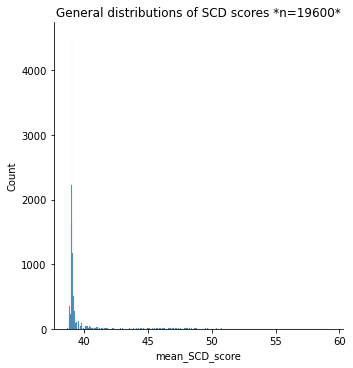

In [4]:
dfs.reset_index(drop=True, inplace=True)
# dfs = dfs.loc[dfs["ctcf_genomic_score"]!=24.5625]# filtering out weak ctcf (need a way to find better weaker ctcf, these aint working)
# dfs = dfs.loc[dfs["gene_id"]=="ENSMUSG00000026003.5"]
dfs = dfs.loc[dfs["swap_flanks"]== "no"]# "all_for_weak"]#] "all_for_strong"
# sns.displot(dfs_1, x="mean_SCD_score")
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")

# Effect of different background seqs 

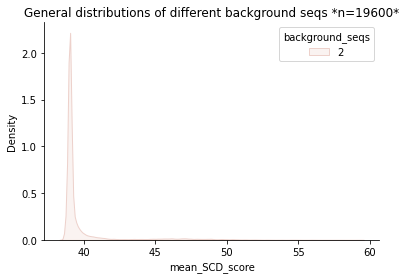

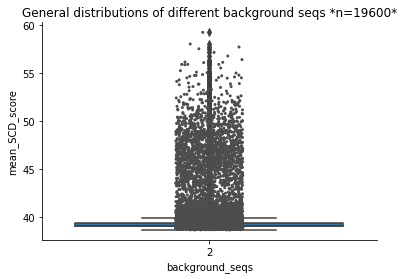

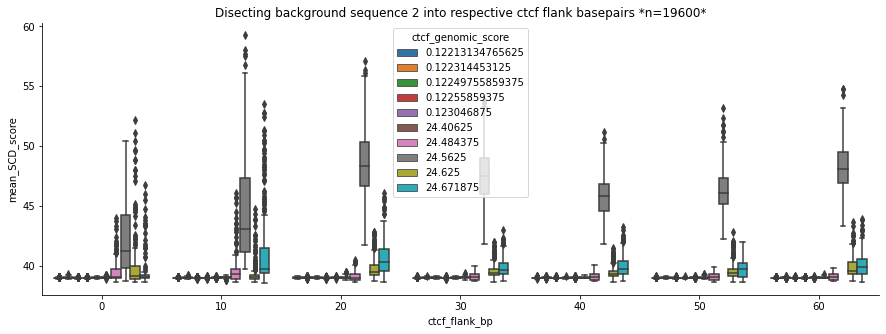

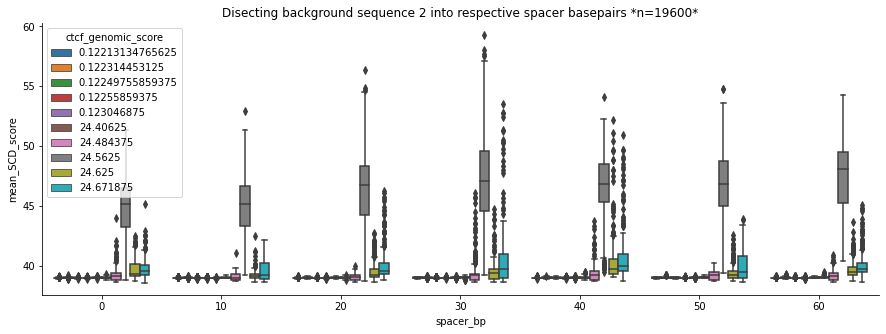

In [5]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="background_seqs", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='background_seqs', y="mean_SCD_score")
sns.stripplot(x="background_seqs", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

for score in [2]:
    df_dummy_parameter = dfs.loc[dfs["background_seqs"]==score]
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting background sequence {score} into respective ctcf flank basepairs *n={df_dummy_parameter.shape[0]}*")
    sns.despine(top = True, right = True)
    # plt.ylim([35, 90])
    plt.show()
    plt.close()
    
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='spacer_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting background sequence {score} into respective spacer basepairs *n={df_dummy_parameter.shape[0]}*")
    sns.despine(top = True, right = True)
    # plt.ylim([35, 90])
    plt.show()
    plt.close()

# Effect of locus orientation

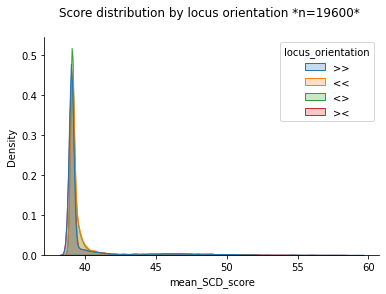

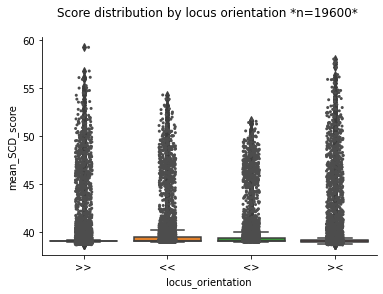

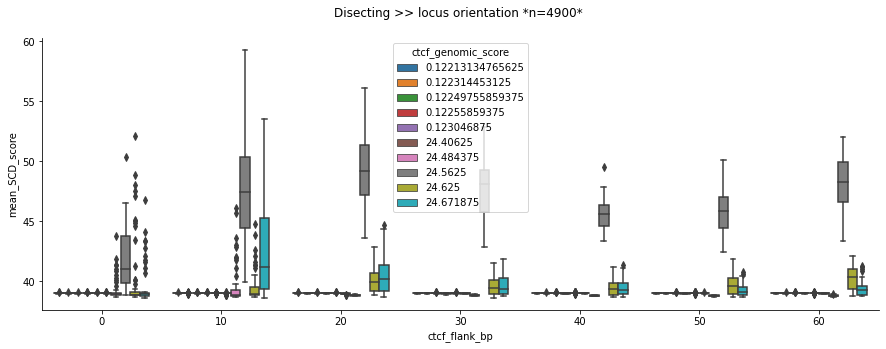

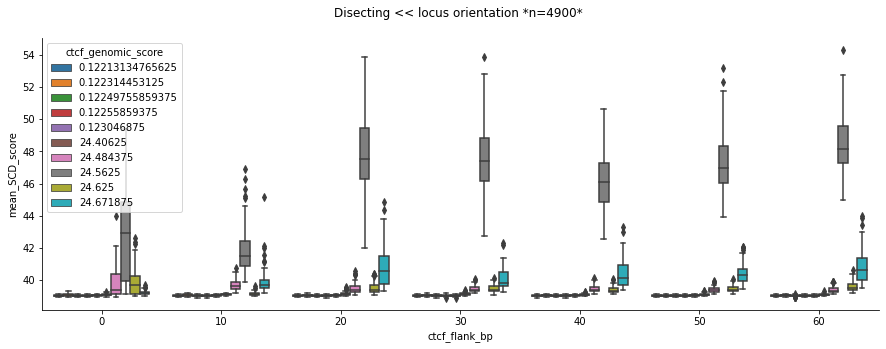

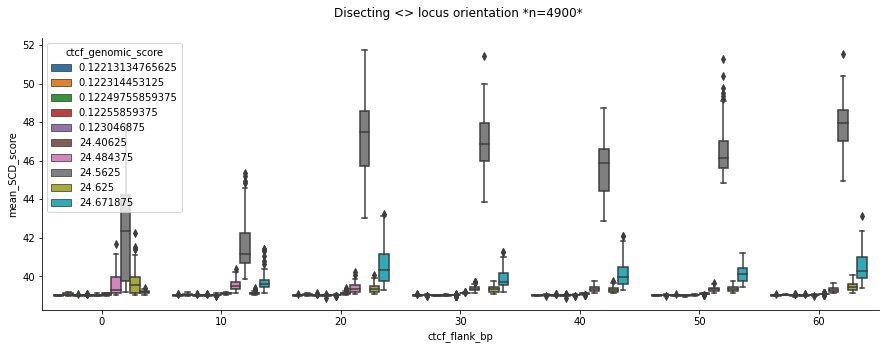

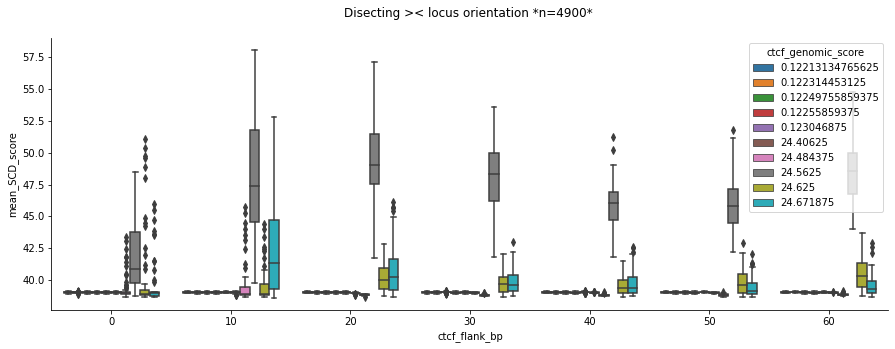

In [6]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="locus_orientation", bw_adjust=.3, fill=True)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='locus_orientation', y="mean_SCD_score")
sns.stripplot(x="locus_orientation", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [">>","<<","<>","><"]: #
    df_dummy_parameter = dfs.loc[dfs["locus_orientation"]==score]  
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score") # palette='viridis_r',
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} locus orientation *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    # plt.ylim([35, 100])
    plt.show()
    plt.close()
    
    
#     I used this to see how genes are affected each orientation and flank
 
    # for flank in [i for i in range(0,101,20)]:
    #     df_dummy_parameter_1 = df_dummy_parameter.loc[dfs["gene_flank_bp"]==flank]
    #     sns.boxplot(data=df_dummy_parameter_1, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    #     # sns.stripplot(x="swap_flanks", y="mean_SCD_score", data=df_dummy_parameter_1, size=3, color=".3", linewidth=0)
    #     plt.title(f"Disecting {flank} flanking basepairs following{score} *n={df_dummy_parameter_1.shape[0]}*")
    #     # plt.ylim([35, 100])
    #     plt.show()
    #     plt.close()

# Effect of CTCF flank basepairs

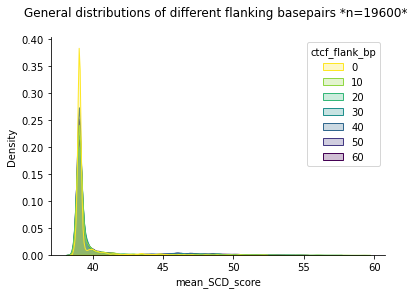

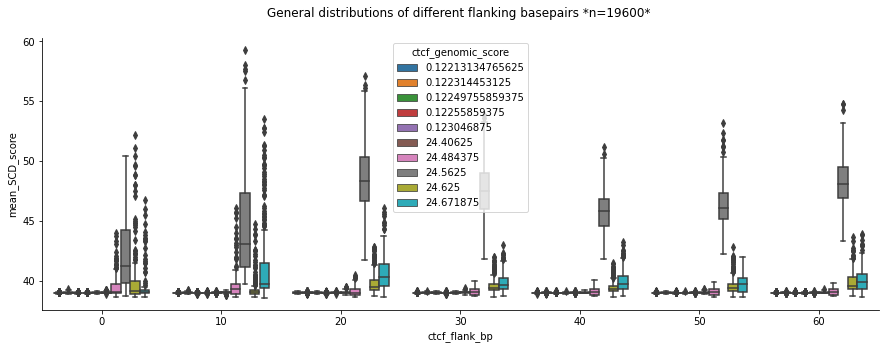

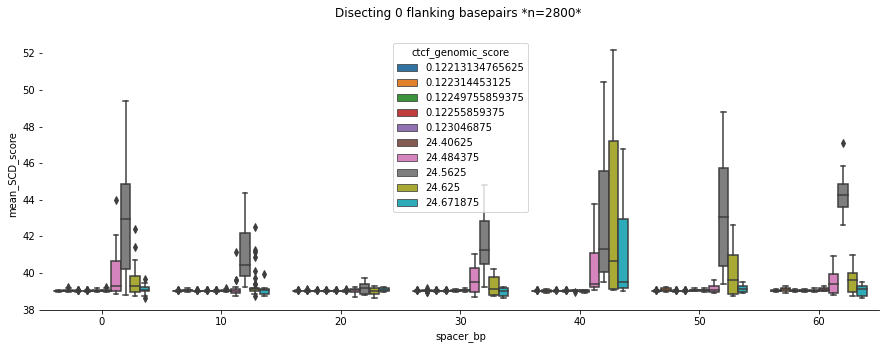

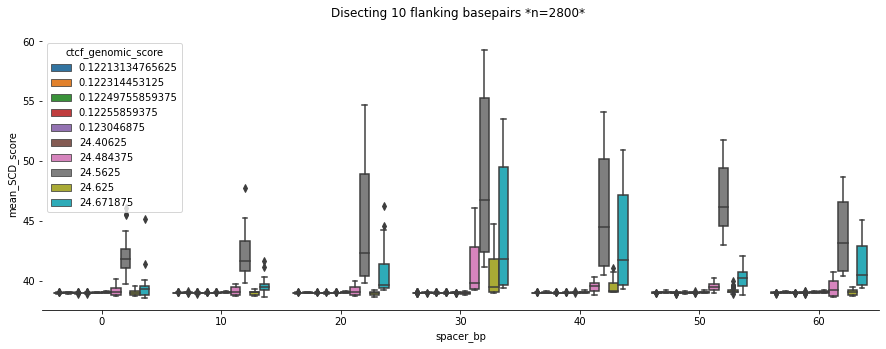

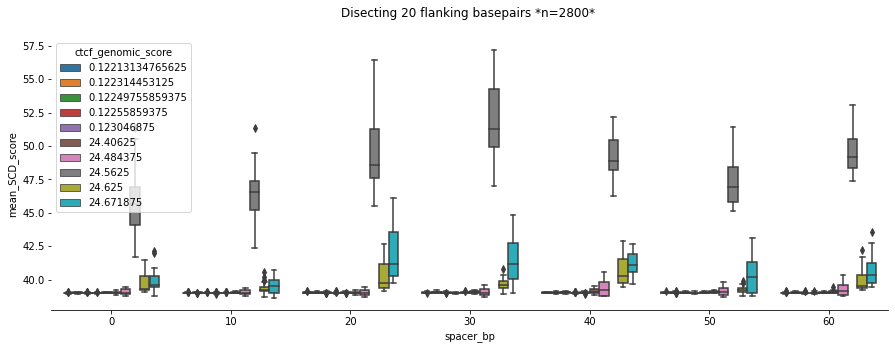

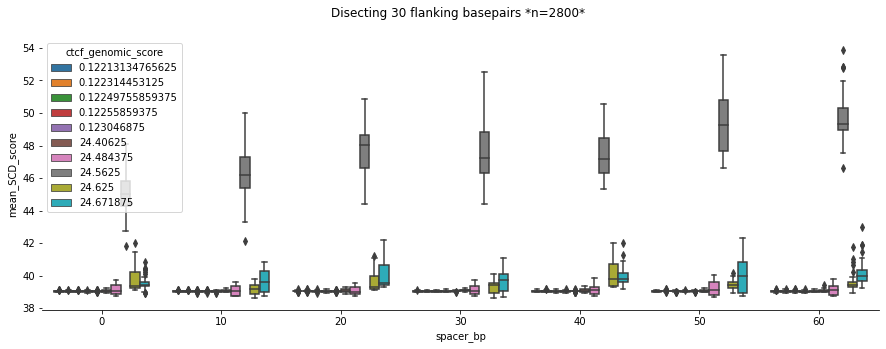

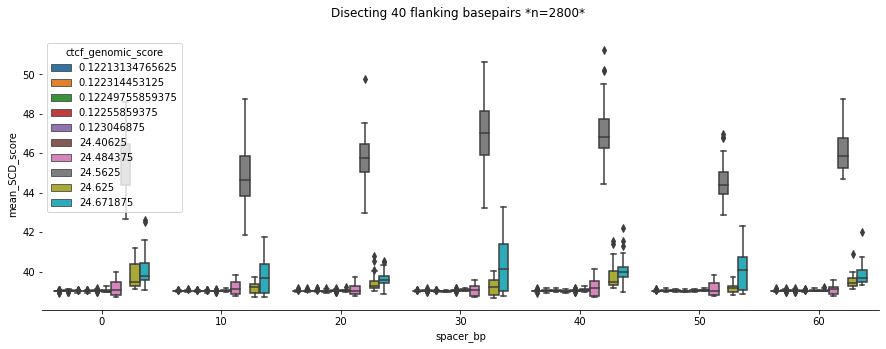

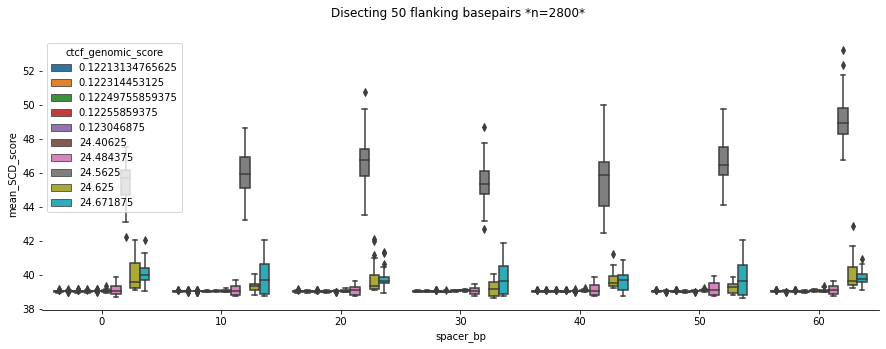

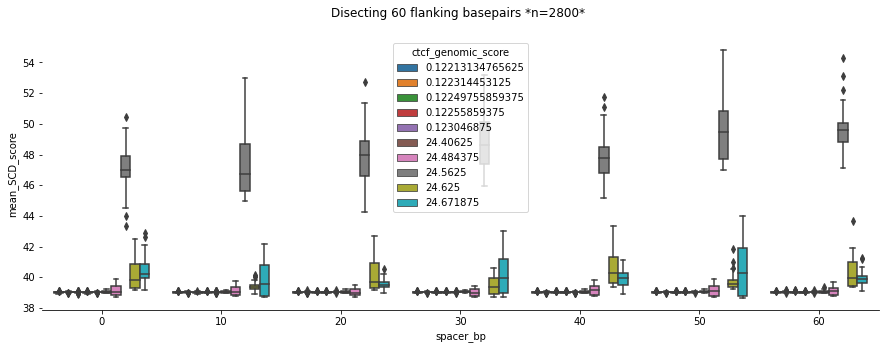

In [7]:
# flank_bp = 

sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_flank_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(15,5))
ax = sns.boxplot(data=dfs, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")#palette='viridis_r',
# sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [i for i in range(0,61,10)]:#[i for i in range(0,501,100)]:# 
    df_dummy_parameter = dfs.loc[dfs["ctcf_flank_bp"]==score]
    # with sns.set_style("whitegrid"):
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='spacer_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True, left=True)
    # plt.ylim([35, 100])
    plt.show()
    plt.close()

# Effect of enhancer flank basepairs

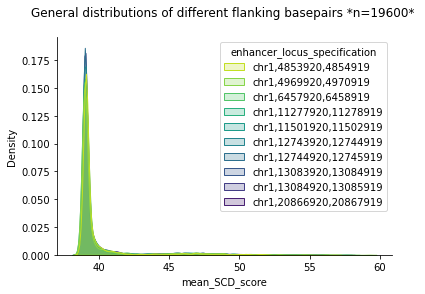

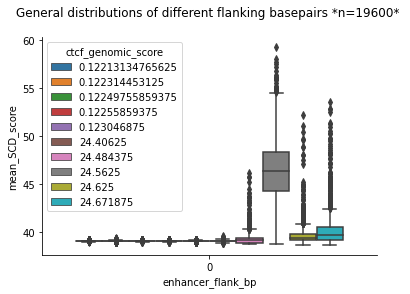

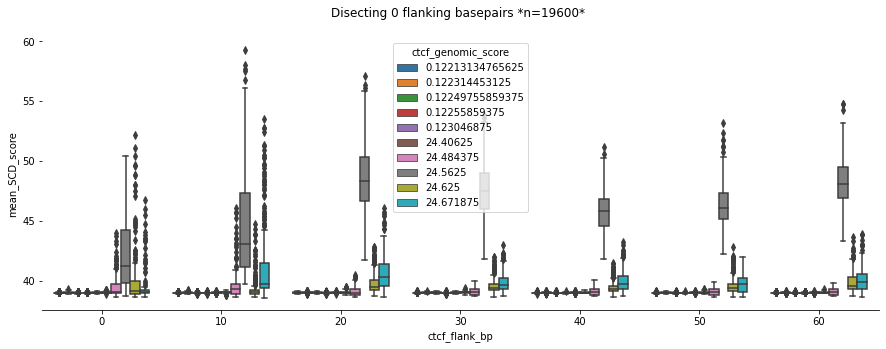

In [8]:
# flank_bp = 

sns.kdeplot(data=dfs, x="mean_SCD_score", hue="enhancer_locus_specification", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='enhancer_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")#,hue=""
# sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [0]:#[i for i in range(0,501,100)]:# 
    df_dummy_parameter = dfs.loc[dfs["enhancer_flank_bp"]==score]
    # with sns.set_style("whitegrid"):
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True, left=True)
    # plt.ylim([35, 70])
    plt.show()
    plt.close()

# Effect of swaping flank basepairs

In [9]:
# flank_bp = 

# sns.kdeplot(data=dfs, x="mean_SCD_score", hue="swap_flanks", bw_adjust=.3, fill=True, palette='viridis_r')
# plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

# sns.boxplot(data=dfs, x='swap_flanks', y="mean_SCD_score", palette='viridis_r')
# # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
# plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

# for score in ["weak_for_strong","strong_for_weak"]:#[i for i in range(0,501,100)]:# 
#     df_dummy_parameter = dfs.loc[dfs["swap_flanks"]==score]
#     # with sns.set_style("whitegrid"):

#     sns.boxplot(data=df_dummy_parameter, x='gene_flank_bp', y="mean_SCD_score")
#     # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#     plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
#     sns.despine(top = True, right = True, left=True)
#     # plt.ylim([35, 70])
#     plt.show()
#     plt.close()

# Effect of spacing basepairs

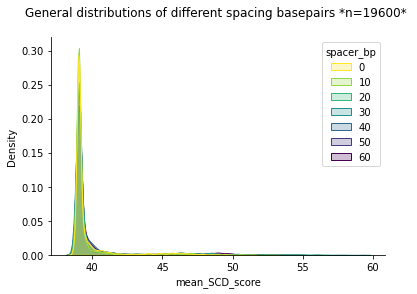

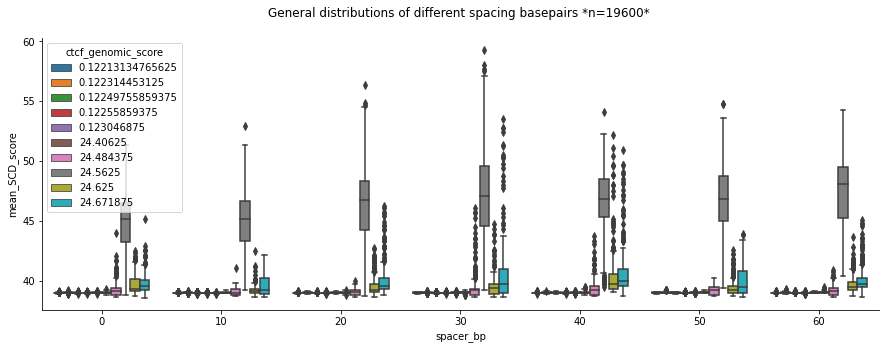

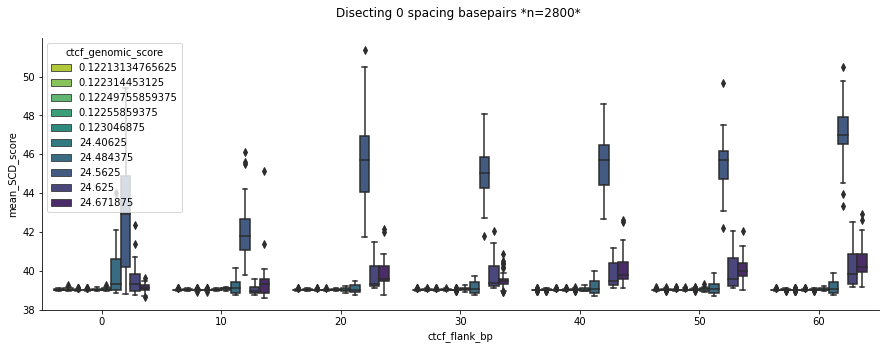

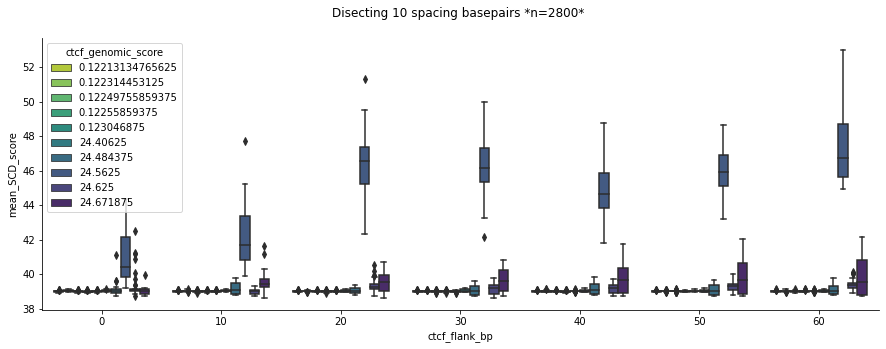

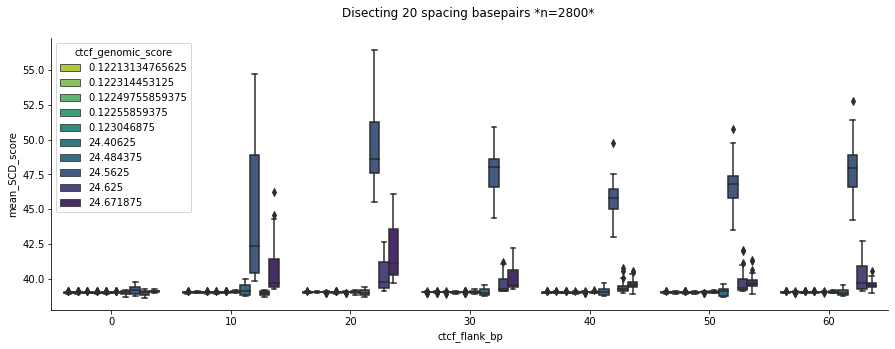

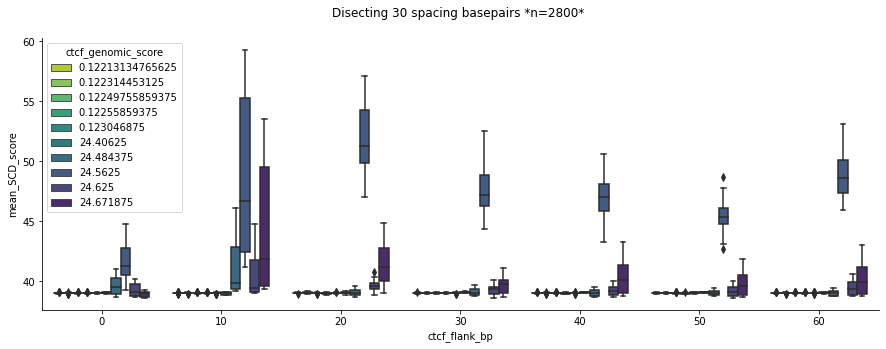

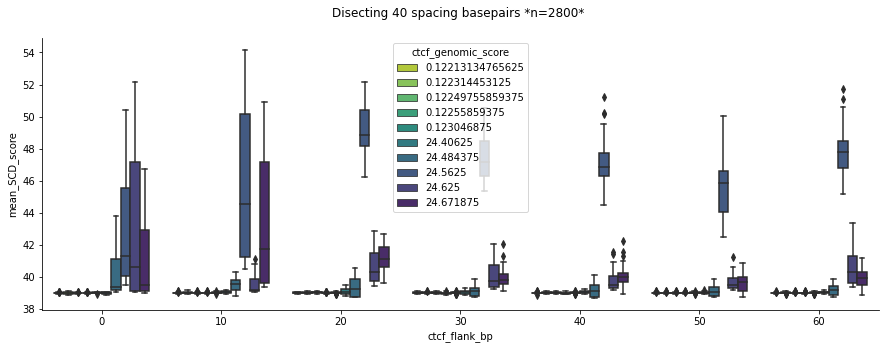

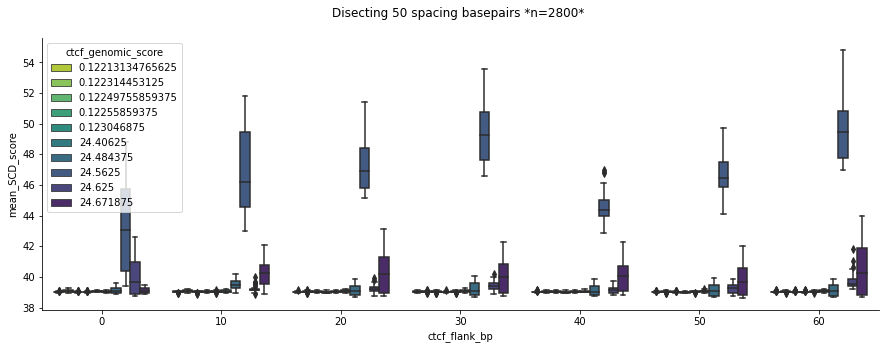

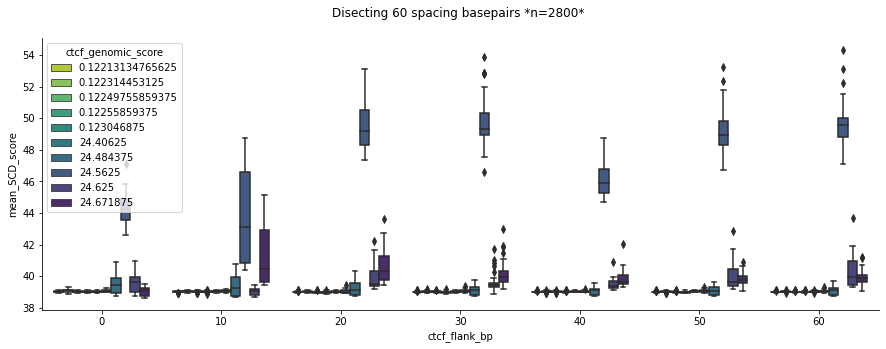

In [10]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="spacer_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()


plt.figure(figsize=(15,5))
ax = sns.boxplot(data=dfs, x='spacer_bp', y="mean_SCD_score",  hue="ctcf_genomic_score") # palette='viridis_r'
# sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [i for i in range(0,61,10)]: 
    df_dummy_parameter = dfs.loc[dfs["spacer_bp"]==score]
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", palette='viridis_r', hue="ctcf_genomic_score")
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0, hue="ctcf_genomic_score")
    plt.title(f"Disecting {score} spacing basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    # plt.ylim([35, 100])
    plt.show()
    plt.close()

# Attempt to fish possible influencial genes

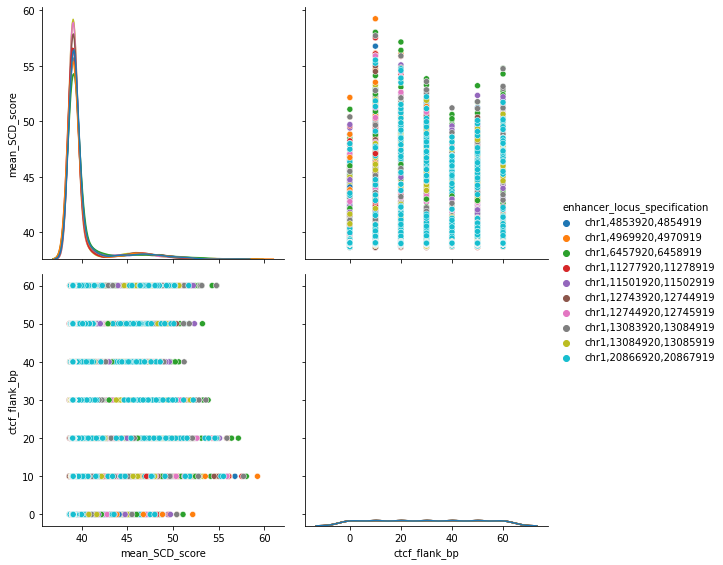

In [11]:
g = sns.PairGrid(dfs, vars=["mean_SCD_score", "ctcf_flank_bp"], hue="enhancer_locus_specification",height=4)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

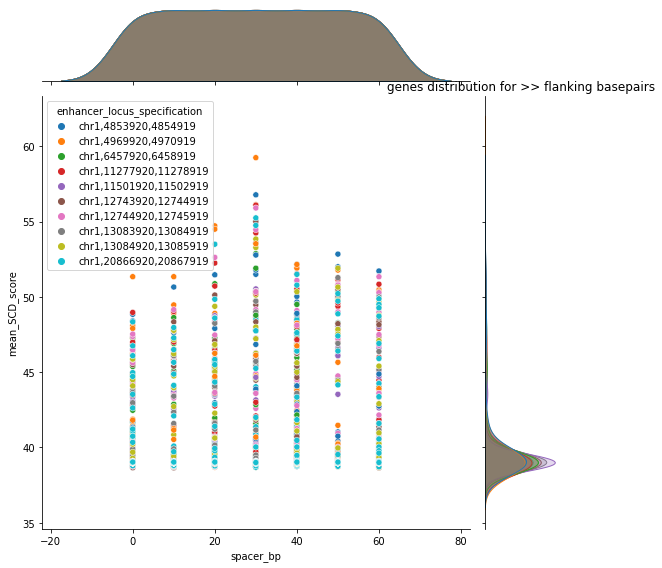

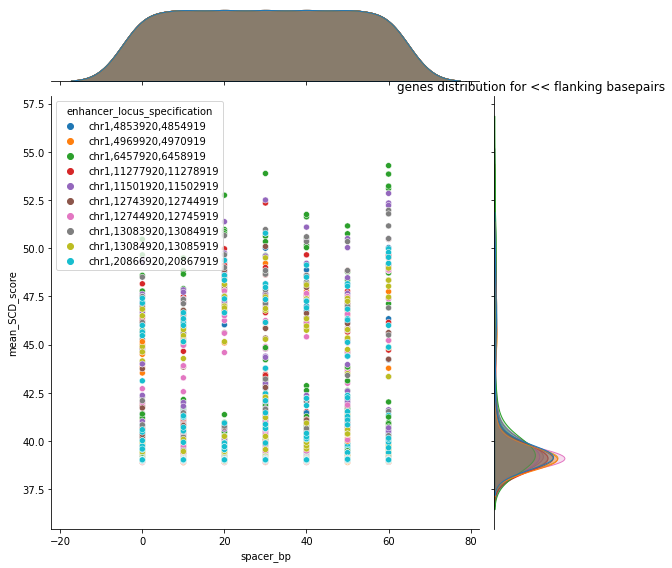

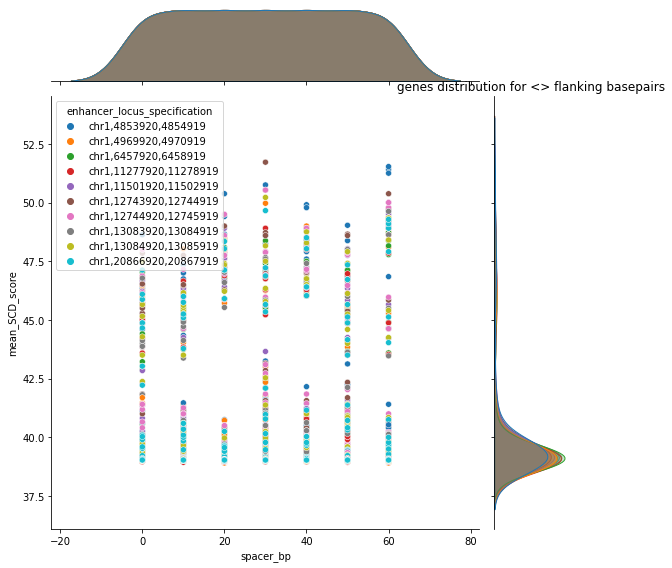

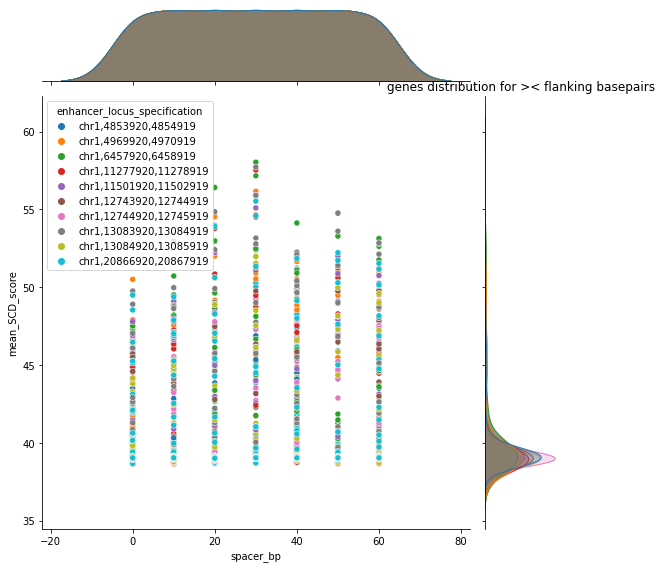

In [12]:
for score in [">>","<<","<>","><"]: #
    data_1 = dfs.loc[dfs["locus_orientation"]==score]
    cutt_off = 0
    sns.jointplot(data=data_1.loc[data_1["mean_SCD_score"]>cutt_off], y=f"mean_SCD_score", x = "spacer_bp", hue="enhancer_locus_specification",height=8)
    plt.title(f"genes distribution for {score} flanking basepairs")

# Follow up on the possible influencial genes

In [13]:
for special_gene in ["ENSMUSG00000026003.5", "ENSMUSG00000033813.15"]: #"ENSMUSG00000094571.1","ENSMUSG00000107222.1","ENSMUSG00000107185.1","ENSMUSG00000106945.1","ENSMUSG00000001376.17","ENSMUSG00000107233.1"]:
    for score in [">>","<<","<>","><"]: 
        data_1 = dfs.loc[dfs["locus_orientation"]==score]
        data_2 = data_1.loc[data_1["enhancer_locus_specification"]==special_gene]
        # data_1 = dfs.loc[dfs["spacer_bp"]==20]
        plt.figure(figsize=(15,5))
        ax = sns.boxplot(data=data_2, y=f"mean_SCD_score", x = "ctcf_flank_bp", hue="ctcf_genomic_score")
        plt.title(f"Gene *{special_gene}* analysis for {score} orientation *n={data_2.shape[0]}* \n")
        sns.despine(top = True, right = True)
        dt=[i for i in range(0,8,1)]
        plt.plot(dt,[45]*(len(dt)),color='r')
        plt.ylim([35, 60])
        plt.show()
        plt.close()
    print("*****************************************\n \n \n \n \n")

ValueError: min() arg is an empty sequence

<Figure size 1080x360 with 0 Axes>

In [ ]:
# df_3d = pd.DataFrame()
# df_3d['x'] = dfs['flank_bp']
# df_3d['y'] = dfs['spacer_bp']
# df_3d['z'] = dfs['locus_orientation']

# sns.pairplot(df_3d)

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter3D(dfs['flank_bp'].values.tolist(),dfs['spacer_bp'].values.tolist(),dfs['locus_orientation'].values.tolist())

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = dfs["mean_SCD_score"]
xdata = dfs['spacer_bp']
ydata = dfs['ctcf_flank_bp']

ax.set_zlabel('mean_SCD_score')
ax.set_xlabel('spacer_bp')
ax.set_ylabel('ctcf_flank_bp')
# ax.set_zscale('log')

# get colormap from seaborn
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap =cmap)

In [ ]:
# Test input
from akita_utils.program_setup import Locus, Gene, CTCF, create_insertions_sequences, genome_open

test_locus = Locus([CTCF,Gene])
    
test_locus.insert(Gene("rat_1",'chr11',22206811,22206830,'+'))
test_locus.insert(CTCF("rat_2",'chr11',22206811,22206830,[0,0],'+'))


# Expected output
expected_output = [np.array([[1, 0, 0, 0],
                             [0, 0, 0, 1],
                             [0, 0, 1, 0],
                             [0, 1, 0, 0]]),  # one-hot encoded DNA sequence for Element 1
                   np.array([[1, 0, 0, 0],  # one-hot encoded DNA sequence for left flank of CTCF element
                             [0, 0, 0, 1],
                             [0, 0, 1, 0],
                             [0, 1, 0, 0],
                             [0, 0, 1, 0],  # one-hot encoded DNA sequence for CTCF element
                             [0, 1, 0, 0],
                             [1, 0, 0, 0],  # one-hot encoded DNA sequence for right flank of CTCF element
                             [0, 0, 0, 1]])]

# Test
output = create_insertions_sequences(test_locus, genome_open())

expected_output == output

# akita_utils.dna_utils.dna_1hot(genome_open().fetch('chr11',22206811,22206811))

# print(CTCF("rat_1",'chr11',22206811,22206830,[1,1],'+'))

In [6]:
from ast import literal_eval
from akita_utils.program_setup import LOCUS, INSERT, create_insertions_sequences, genome_open
from akita_utils.seq_gens import modular_offsets_insertion_seqs_gen, _multi_insert_offsets_casette, generate_spans_start_positions, mask_spans
motifs_file_test = "/home1/kamulege/akita_utils/bin/insert_promoter_experiment/data/new_promoter_control_expt_ctcfs_alone.tsv"
background_file = "/project/fudenber_735/tensorflow_models/akita/v2/analysis/background_seqs.fa"
seq_coords_df = pd.read_csv(motifs_file_test, sep="\t")

background_seqs = []
with open(background_file, "r") as f:
    for line in f.readlines():
        if ">" in line:
            continue
        background_seqs.append(akita_utils.dna_utils.dna_1hot(line.strip()))
        
        
def modular_offsets_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open):# delimiter specification
    """ sequence generator for making modular insertions from tsvs
        yields a one-hot encoded sequence
        that can be used as input to akita via PredStreamGen

    Args:
        seq_coords_df (dataframe): important colums spacer_bp,locus_orientation,background_seqs,insert_strand,insert_flank_bp,insert_loci 
        background_seqs (fasta): file containing background sequences
        genome_open (opened_fasta): fasta with chrom data

    Yields:
        one-hot encoded sequence: sequence containing specified insertions
    """
    collection = []
    for s in seq_coords_df.itertuples():
        seq_1hot_insertions = []
        offsets_bp = literal_eval(s.offsets_bp)
        orientation_string = s.locus_orientation
        seq_1hot = background_seqs[s.background_seqs].copy()        

        for module_number in range(len(s.insert_loci.split("$"))):
            locus_specification = s.insert_loci.split("$")[module_number]
            if locus_specification != "None":
                chrom,start,end,strand = locus_specification.split(",")
                flank_bp = int(s.insert_flank_bp.split("$")[module_number])
                # chrom,start,end = locus.split(",")
                seq_1hot_insertion = akita_utils.dna_utils.dna_1hot(genome_open.fetch(chrom, int(start) - flank_bp, int(end) + flank_bp).upper())
                if strand == "-":
                    seq_1hot_insertion = akita_utils.dna_utils.hot1_rc(seq_1hot_insertion)
                
                if s.gene_locus_specification and s.num_of_motifs > 5:
                    print(s.gene_locus_specification, s.num_of_motifs)
                    motif = akita_utils.format_io.read_jaspar_to_numpy()
                    motif_window = len(motif)-3 #for compartibility ie (19-3=16 which is a multiple of 2,4,8 the shuffle parameters)
                    spans = generate_spans_start_positions(seq_1hot_insertion, motif, 8)
                    seq_1hot_insertion = mask_spans(seq_1hot_insertion, spans, motif_window)
                
                seq_1hot_insertions.append(seq_1hot_insertion)

        seq_1hot = _multi_insert_offsets_casette(seq_1hot, seq_1hot_insertions, offsets_bp, orientation_string)
        
        collection += [seq_1hot]
    return collection

modular_offsets_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open())
        

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
result_1,seq_1 = modular_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open())
result_2,seq_2 = flexible_flank_modular_insertion_seqs_gen(seq_coords_df, background_seqs, genome_open())

np.all(result_1) ==np.all(result_2)

In [ ]:
print(len(seq_1[0])) 
print(len(seq_2[0]))

In [ ]:
seq_coords_df

In [ ]:
len([0, 60, 10000])